# About The Dataset

### Dataset Resource: https://www.kaggle.com/datasets/jboysen/london-crime/data

The dataset contains crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12

# Preparing data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image as img
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from scipy import stats

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
mpl.style.use(['ggplot'])

In [4]:
dfLon = pd.read_csv("C:/Users/didan/Hacktiv8_5/london_crime_by_lsoa.csv")
print('data read into a pandas dataframe')

data read into a pandas dataframe


# Loading Data

In [5]:
dfLon.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


In [6]:
dfLon.tail(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [7]:
dfLon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Informasi Dataset

In [8]:
dfLon.shape

(13490604, 7)

Dimensi

In [9]:
dfLon.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [38]:
# Checking for missing values
dfLon.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [40]:
# Membuat list range 2011-2016
years = list(map(str, range(2011, 2017)))
years

['2011', '2012', '2013', '2014', '2015', '2016']

In [41]:
borough_crime = dfLon.pivot_table(index='year', columns='borough', values='value', aggfunc=np.sum, fill_value=0)
borough_crime

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [42]:
borough_crime2 = borough_crime.transpose()
borough_crime2.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [44]:
borough_crime2['Total Crime'] = borough_crime2.sum(axis=1, numeric_only=True)
borough_crime2.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Crime
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447.0
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191.0
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136.0
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551.0
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349.0


In [46]:
# Mengubah kolom menjadi string
borough_crime2.columns = list(map(str, borough_crime2.columns))
borough_crime2.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Crime
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447.0
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191.0
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136.0
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551.0
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349.0


In [48]:
# Sort borough berdasarkan total crime
borough_crime2.sort_values(by='Total Crime', ascending=False, axis=0, inplace=True)
borough_crime2.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Crime
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028.0
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178.0
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809.0
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147.0
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024.0


# Visualizing Data

## Area Plot

Q: What was the highest criminal case in the major category during 2008-2016 in the city of London?

In [56]:
major_crime = dfLon[['major_category','value','year']].groupby(['year','major_category'])[['value']].sum()
major_crime = major_crime.unstack()
major_crime['value']

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


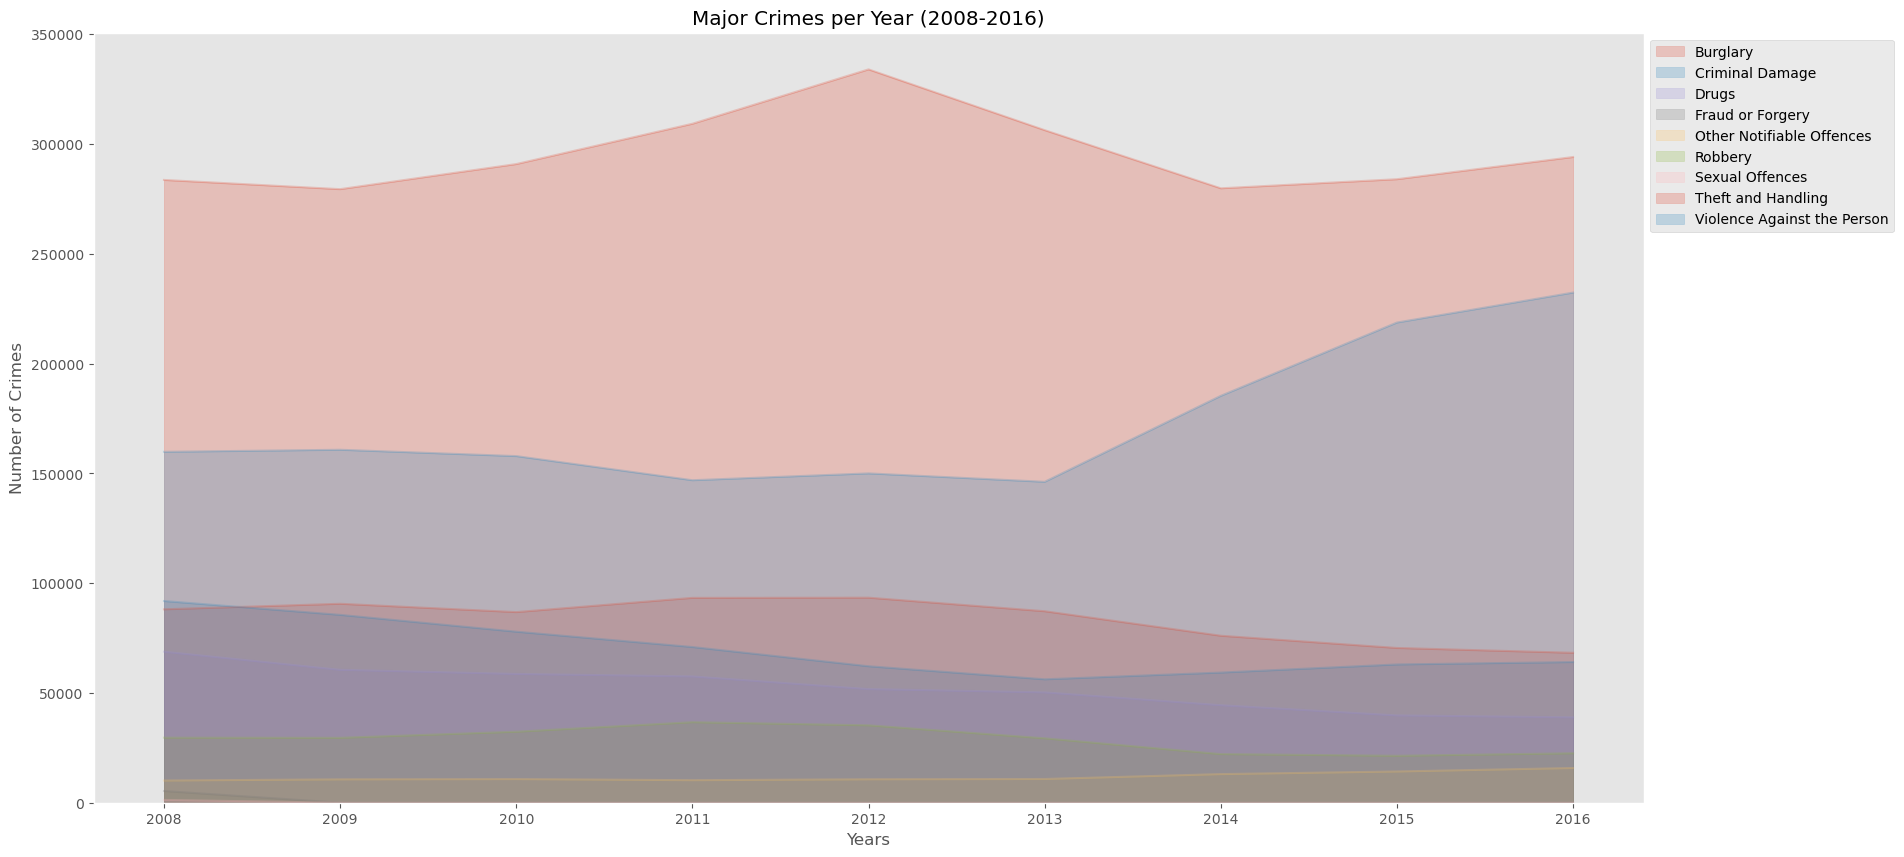

In [58]:
major_crime['value'].plot(kind='area',
             alpha = 0.25,
            stacked=False,
            figsize=(20,10)
            )
plt.title('Major Crimes per Year (2008-2016)')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

 Berdasarkan Area Plot diatas, dapat disimpulkan bahwa major crime terbanyak sepanjang tahun 2008-2016 di London yaitu Theft dan Handling dengan rata-rata 300.000 kasus, disusul dengan Violence againts the Person yang menyentuh angka tertinggi di tahun 2016.

## Bar Chart

Q: Which number of minor category of crime are the lowest in London?

In [14]:
minor_crime = dfLon.minor_category.value_counts(ascending=False)
minor_crime

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

<Axes: title={'center': 'Sum of Crimes at Minor Category in London from 2008-2016'}>

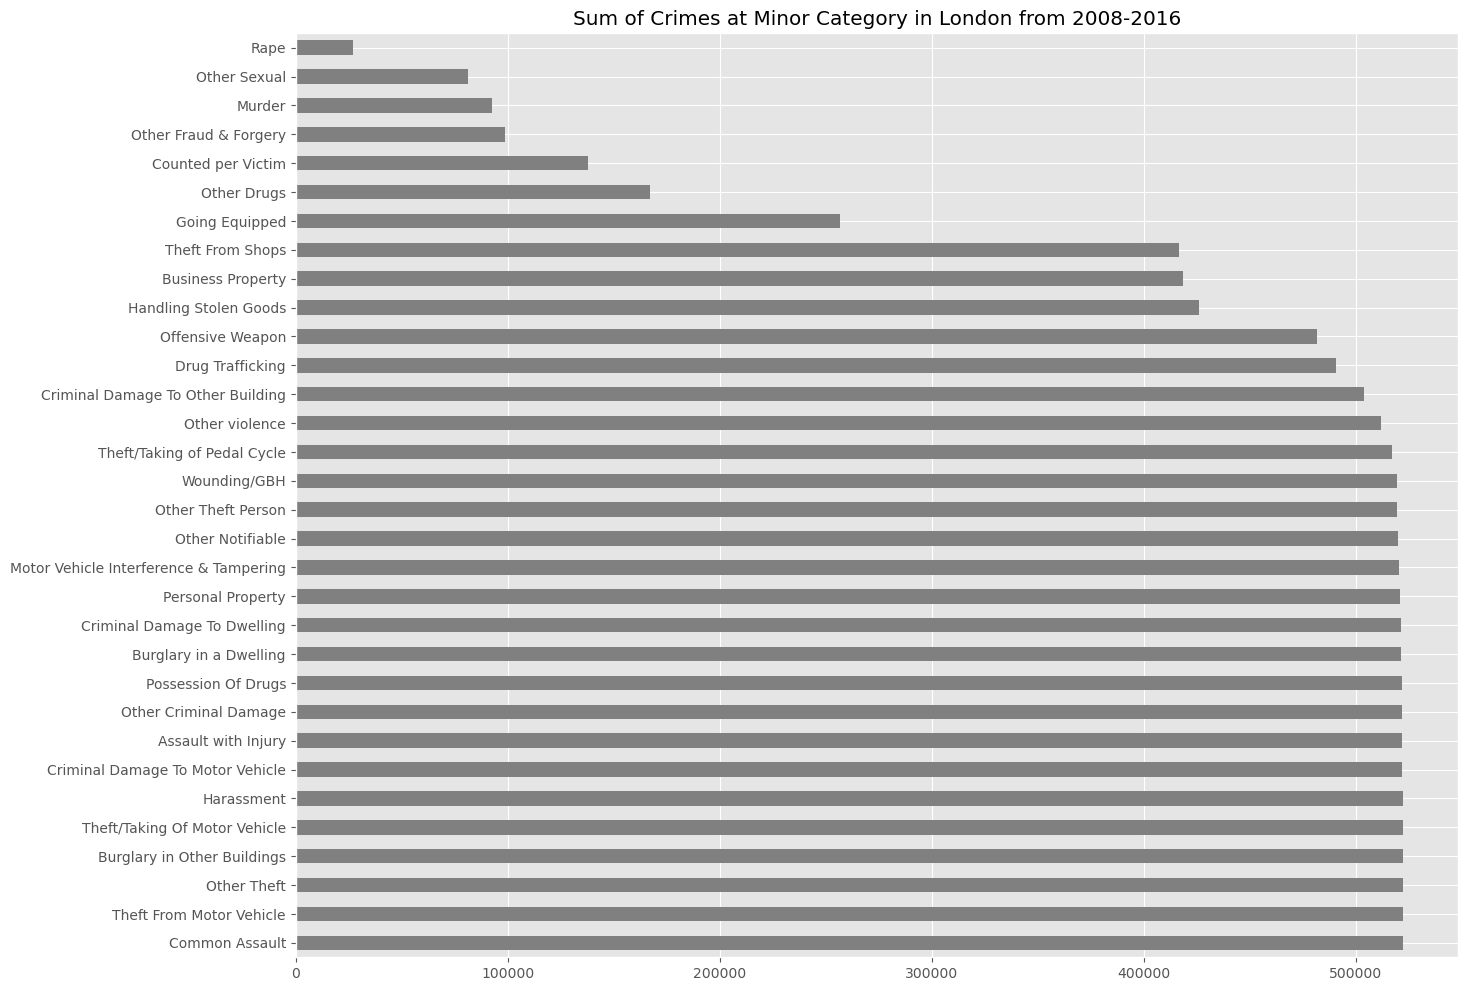

In [29]:
minor_crime.plot.barh(figsize=(15, 12), color='gray',
                    title = "Sum of Crimes at Minor Category in London from 2008-2016")

Berdasarkan grafik Bar diatas, dapat disimpulkan bahwa Rape merupakan kasus kriminal minor category terendah dengan 27.000 kasus di London sepanjang tahun 2008-2016. Kemudian, disusul dengan kasus Other Sexual dan Murder diangka rata-rata 90.000 kasus.

## Histogram

Q: How do the crime rates for Drugs, Robbery and Criminal Damage change during 2011-2016?

In [76]:
major_crime2 = major_crime['value'][['Robbery','Drugs','Criminal Damage']].loc[2011:2017]
major_crime2 

major_category,Robbery,Drugs,Criminal Damage
year,,,
2011,36679,57550,70914
2012,35260,51776,62158
2013,29337,50278,56206
2014,22150,44435,59279
2015,21383,39785,62976
2016,22528,38914,64071


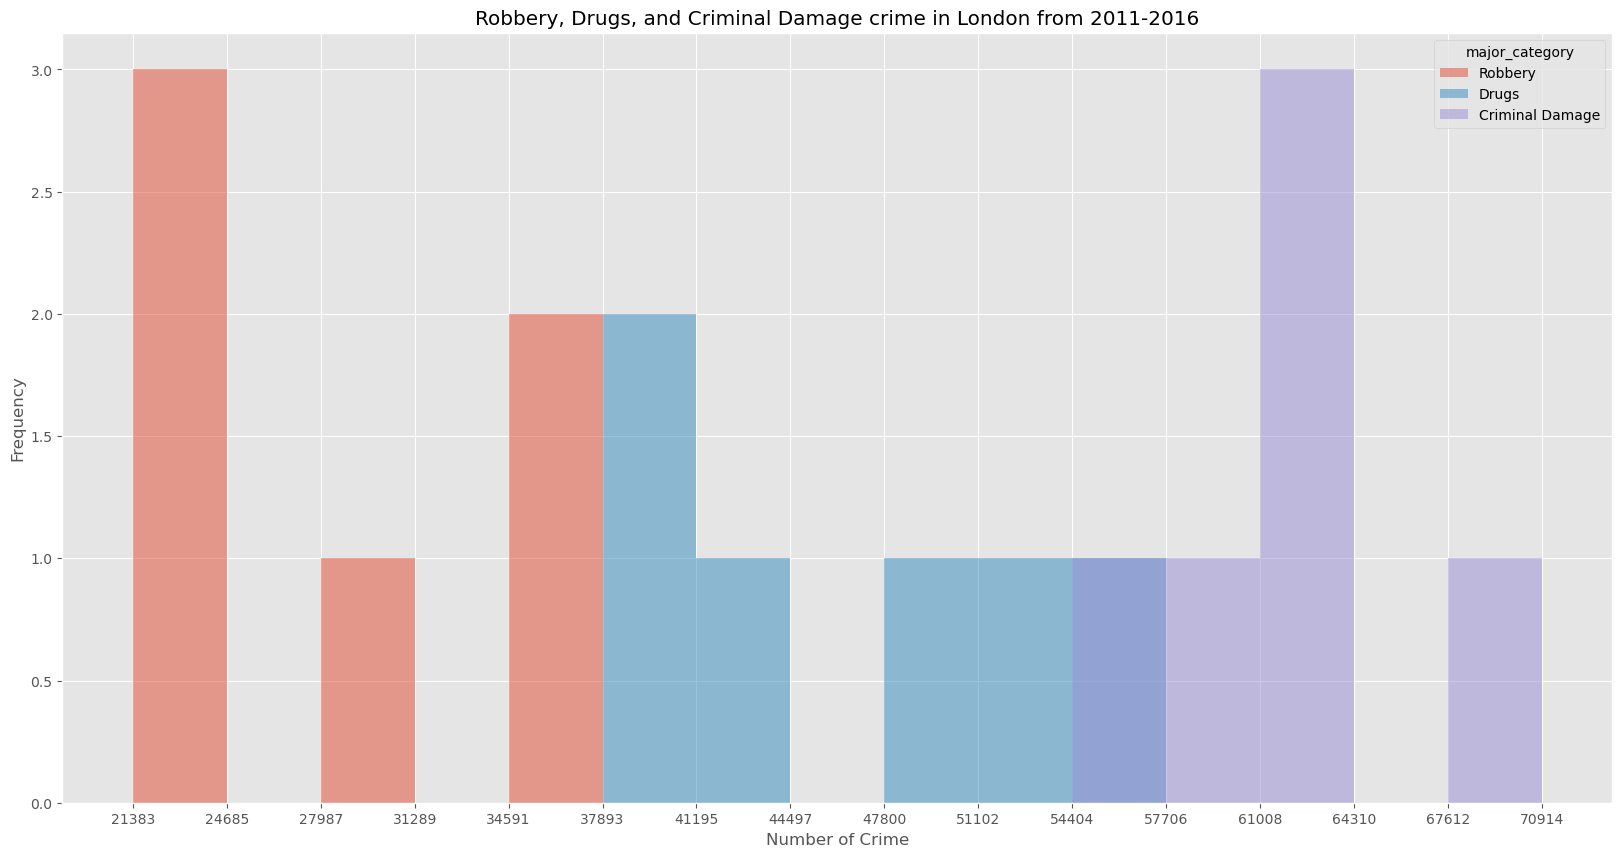

In [78]:
count, bin_edges = np.histogram(major_crime2, 15)

major_crime2.plot(kind='hist', figsize=(20,10), bins=15, alpha=0.5,xticks=bin_edges)

plt.title('Robbery, Drugs, and Criminal Damage crime in London from 2011-2016')
plt.ylabel('Frequency') 
plt.xlabel('Number of Crime') 

plt.show()

Berdasarkan grafik histogram tersebut, selama 5 tahun terakhir sejak 2016 Robbery sedikit mengalami penurunan tingkat kriminal serupa dengan Drugs yang juga menurun cukup signifikan. Sedangkan itu, Criminal Damage sempat menurun dari tahun 2011-2013, dan kembali meningkat 3 tahun setelahnya.

## Scatter Plot

Q: what is the growth in the number of burglary crimes from 2008-2016?

In [33]:
scatter = major_crime['value'][['Burglary']]
scatter

major_category,Burglary
year,
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


In [34]:
scatter2 = scatter.reset_index()
scatter2

major_category,year,Burglary
0,2008,88092
1,2009,90619
2,2010,86826
3,2011,93315
4,2012,93392
5,2013,87222
6,2014,76053
7,2015,70489
8,2016,68285


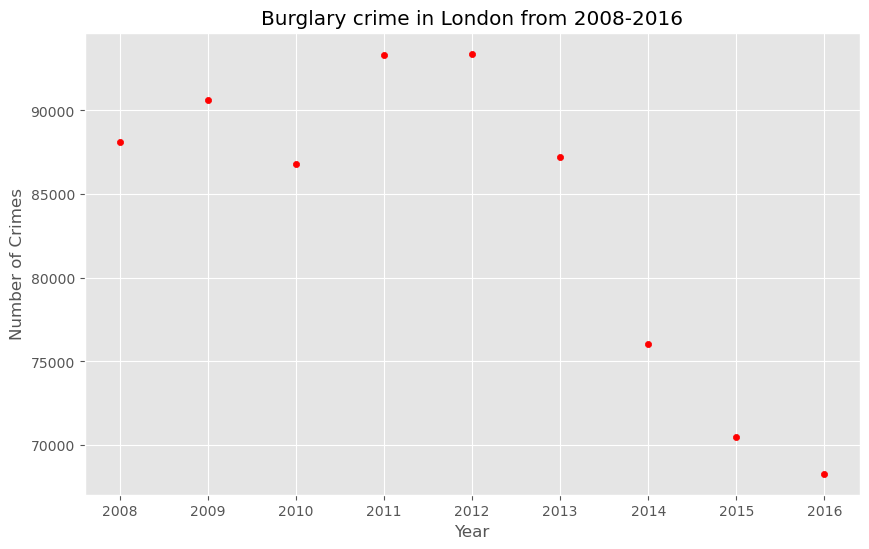

In [37]:
scatter2.plot(kind='scatter', x='year', y='Burglary', figsize=(10, 6), color='red')

plt.title('Burglary crime in London from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

Berdasarkan grafik Scatter Plot diatas, kasus kriminal Major Category Burglary mengalami tren fluktuatif pada tahun 2008 sampai 2011. Sempat stagnan pada tahun 2011 dan 2012, kasus Burglary terus mengalami penurunan kasus yang signifikan hingga menyentuh angka terendahnya pada 2016 dengan 68.285.

## Box Plot

Q: How do cases compare between the Camden and Newham areas during 2011-2016?

In [84]:
camden_newham_crime = borough_crime2.loc[(['Camden', 'Newham'], years)].T
camden_newham_crime

borough,Camden,Newham
2011,33956,27978
2012,31472,30067
2013,28435,27577
2014,27198,28005
2015,29477,29217
2016,29183,30090


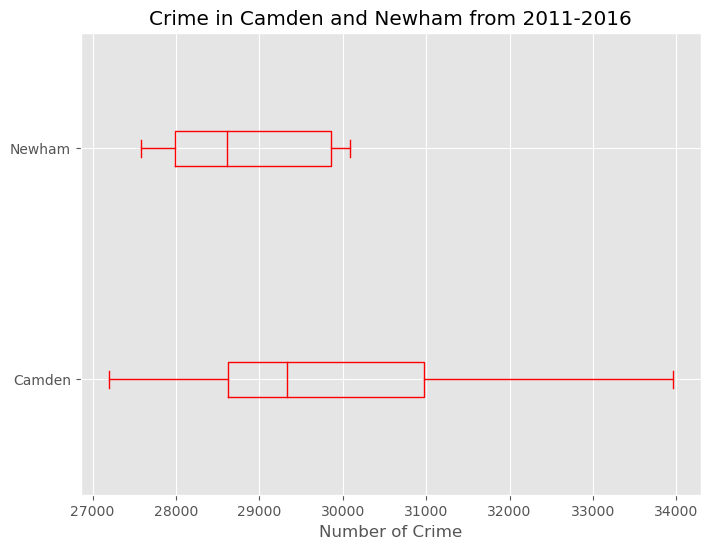

In [86]:
camden_newham_crime.plot(kind='box', figsize=(8, 6), grid=True, color='red', vert=False)

plt.title('Crime in Camden and Newham from 2011-2016')
plt.xlabel('Number of Crime')

plt.show()

Berdasarkan Box plot diatas, perbandingan antara wilayah Camden dan Newham memiliki kesamaan angka kasus pada tahun 2012-2016. Sementara itu, pada 2011 kedua wilayah tersebut mempunyai perbedaan angka yang cukup jauh dengan nilai 33.956 di Camden dan 27.978 kasus di Newham, sehingga keduanya terpaut cukup jauh sekitar 6.000 kasus.

# Pie Chart

Q: What areas have the highest crime rates in London between 2008-2016?

In [88]:
top5_borough = borough_crime2['Total Crime'].head(5)
top5_borough

borough
Westminster    455028.0
Lambeth        292178.0
Southwark      278809.0
Camden         275147.0
Newham         262024.0
Name: Total Crime, dtype: float64

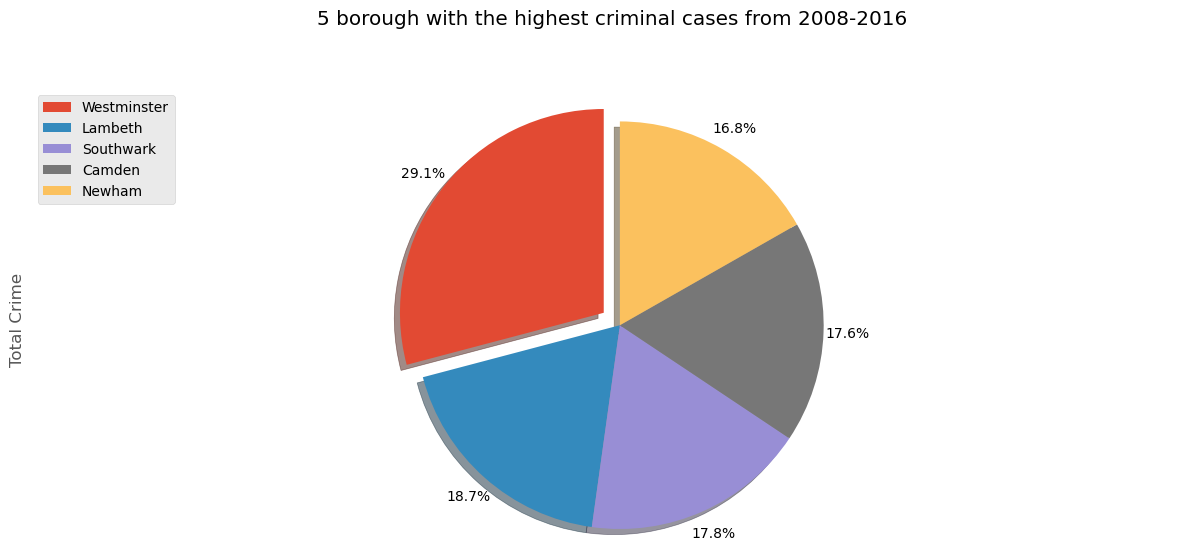

In [92]:
explode_list = [0.1, 0, 0, 0, 0]

top5_borough.plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None, # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                      explode=explode_list
                      )
plt.title('5 borough with the highest criminal cases from 2008-2016', y=1.12)
plt.axis('equal')
plt.legend(labels=top5_borough.index, loc='upper left')

plt.show()

Berdasarkan Pie Chart diatas, Westminster menjadi wilayah dengan kasus kriminalitas tertinggi di London sepanjang 2008-2016 sebanyak 29,1%. Keempat wilayah setelahnya memiliki angka kriminal yang cukup mirip di sekitar 17%.

## Word Cloud

Q: Which areas where crime occurs most often during 2008-2016

In [93]:
freq_borough = dfLon['borough']
freq_borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [94]:
# Mengonversi DataFrame freq_borough menjadi format CSV
freq_borough = freq_borough.to_csv("C:/Users/didan/Hacktiv8_5/crime_by_borough.txt", header=None, index=None, sep=' ', mode='a')

In [95]:
borough = open('C:/Users/didan/Hacktiv8_5/crime_by_borough.txt','r').read()

In [99]:
stopwords = set(STOPWORDS)
wc_borough = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=stopwords)
wc_borough.generate(borough)

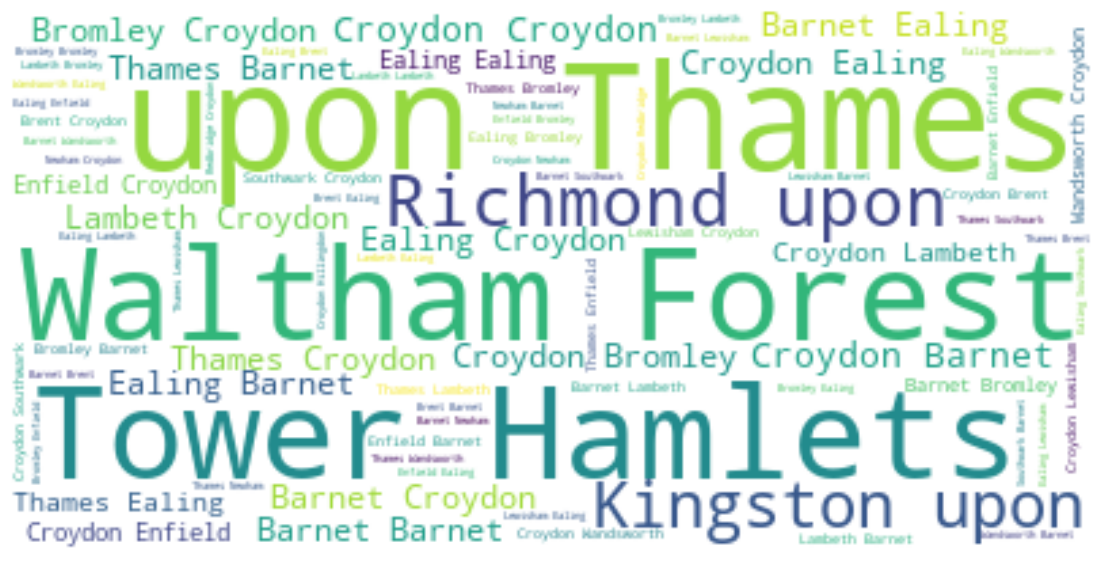

In [100]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wc_borough, interpolation='bilinear')
plt.axis('off')
plt.show()

Dalam Word Cloud tersebut, dapat disimpulkan bahwa borough yang besar seperti Waltham Forest dan Tower Hamlets muncul paling banyak dalam dataset, sehingga kedua wilayah tersebut paling banyak mengalami beragam tindak kriminal dibandingkan wilayah lain.

# Overal Analysis

Dalam analisis data kriminalitas di London by LSOA, kita dapat menarik beberapa kesimpulan berdasarkan visualisasi:

Selama periode tahun 2008 hingga 2016, Theft and Handling (Pencurian dan Penanganan Barang) adalah jenis kejahatan mayor yang paling mendominasi di London. Dengan rata-rata sekitar 300.000 kasus per tahun, jenis kejahatan ini menjadi yang paling umum terjadi. Tahun 2016 mencatat puncak kasus kejahatan ini, bersamaan dengan angka tertinggi untuk jenis kejahatan Violence Against the Person (Kekerasan Terhadap Orang).
Sementara itu, pada minor category, kasus Rape (Pemerkosaan) adalah yang paling rendah dengan hanya 27.000 kasus selama periode tersebut. Kasus Other Sexual (Kejahatan Seksual Lainnya) dan Murder (Pembunuhan) memiliki angka yang rata-rata sekitar 90.000 kasus, meskipun tetap relatif rendah dibandingkan dengan jenis kejahatan mayor.

**Tren Kasus Kriminal**
Pada grafik histogram, kita dapat melihat tren fluktuatif dalam beberapa jenis kejahatan selama beberapa tahun terakhir. Misalnya, kasus Robbery (Perampokan) mengalami penurunan, Drugs (Narkoba) juga mengalami penurunan yang signifikan, dan kasus Criminal Damage (Kerusakan Properti) turun pada tahun 2011-2013, kemudian meningkat kembali beberapa tahun setelahnya.

**Tren Kasus Burglary**
Salah satu jenis kejahatan, yaitu Burglary (Pembobolan Rumah), menunjukkan tren yang menarik. Burglary mengalami fluktuasi antara tahun 2008 hingga 2011, kemudian stagnan selama dua tahun berikutnya, dan akhirnya mengalami penurunan yang signifikan, mencapai angka terendah pada tahun 2016.

**Perbandingan Antara Camden dan Newham**
Grafik box plot memperlihatkan perbandingan antara dua wilayah, Camden dan Newham. Pada tahun 2011, terdapat perbedaan yang cukup signifikan dalam jumlah kasus antara kedua wilayah tersebut, dengan Camden memiliki angka yang lebih tinggi. Namun, pada tahun 2012-2016, keduanya memiliki jumlah kasus yang lebih serupa, dengan perbedaan sekitar 6.000 kasus.

**Wilayah dengan Kriminalitas Tertinggi**
Westminster adalah wilayah dengan jumlah kasus kriminal tertinggi di London selama periode 2008-2016, mencapai 29,1%. Sementara itu, keempat wilayah berikutnya memiliki angka kriminal yang cukup mirip, yaitu sekitar 17%.

Dalam word cloud, kita melihat bahwa borough besar seperti Waltham Forest dan Tower Hamlets muncul paling banyak dalam dataset. Hal ini menunjukkan bahwa kedua wilayah tersebut mengalami beragam tindak kriminal yang signifikan dibandingkan dengan wilayah lainnya.

Kesimpulannya, data kriminalitas London menunjukkan tren dan pola yang berbeda untuk berbagai jenis kejahatan dan wilayah. Analisis visualisasi ini dapat membantu pihak berwenang dan masyarakat dalam memahami pola kejahatan dan mengambil tindakan yang sesuai untuk meningkatkan keamanan.